<a href="https://colab.research.google.com/github/2303a52282/2303A52282-AIML/blob/main/LAB_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Model Accuracy: 1.0000


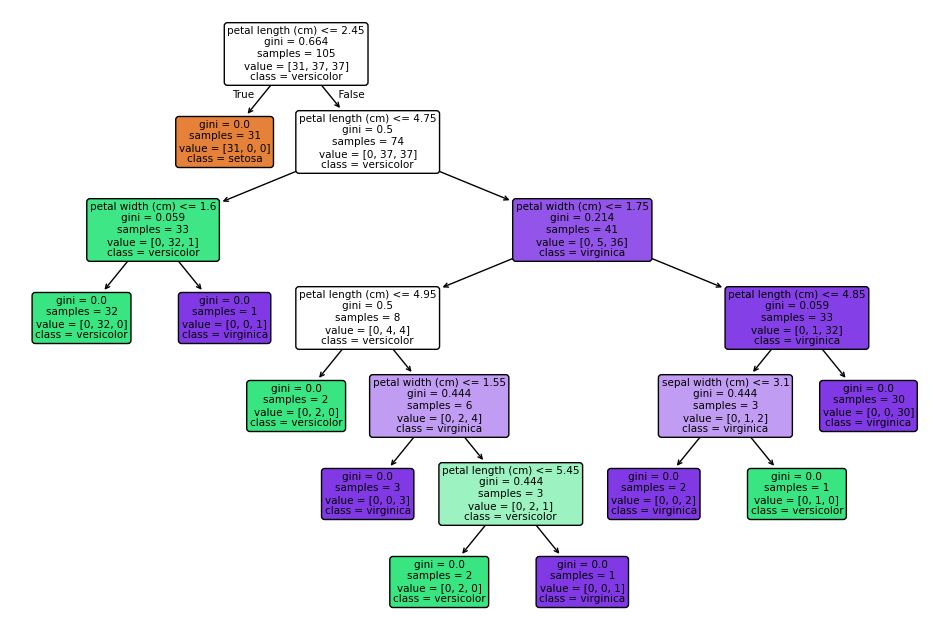

Confusion Matrix (Original):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


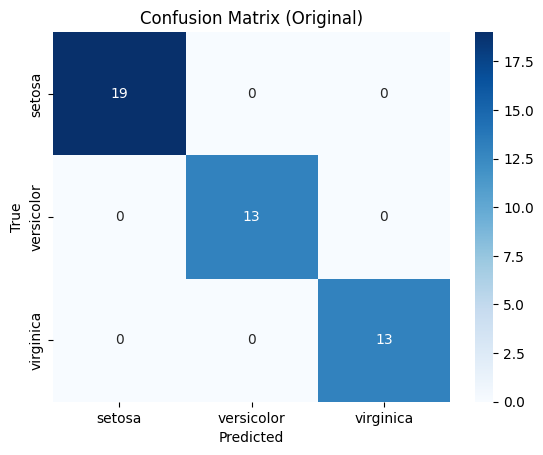

Pruned Model Accuracy: 1.0000


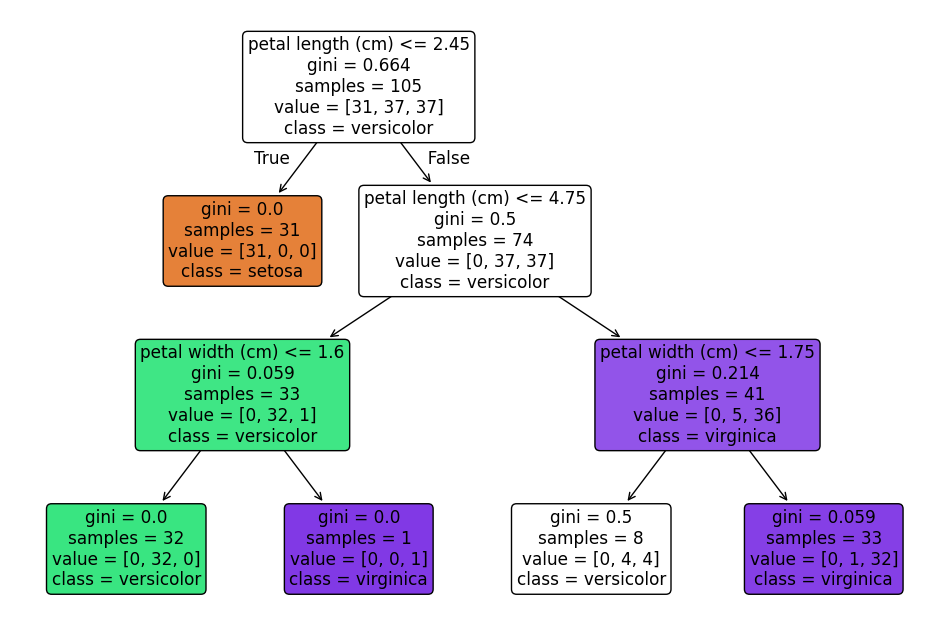

Confusion Matrix (Pruned):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


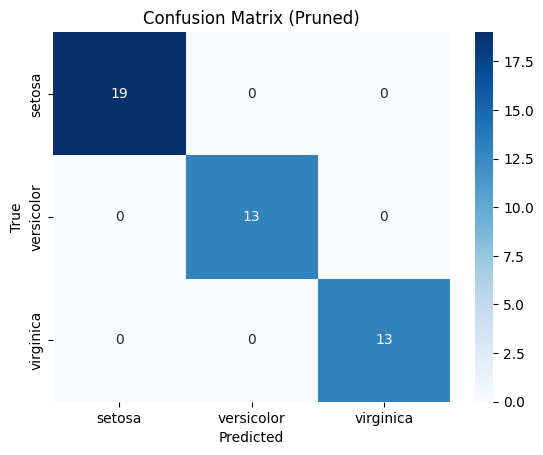

Original Model Accuracy: 1.0000
Pruned Model Accuracy: 1.0000
Feature importances (Pruned Model):
petal length (cm): 0.9251
petal width (cm): 0.0749
sepal width (cm): 0.0000
sepal length (cm): 0.0000


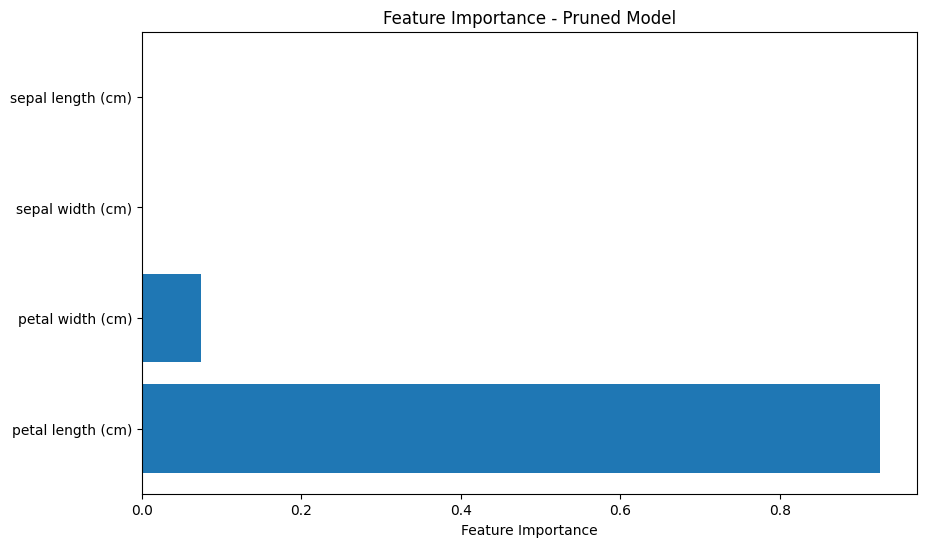

Feature: sepal length (cm), Importance: 0.013333333333333329
Feature: sepal width (cm), Importance: 0.013333333333333329
Feature: petal length (cm), Importance: 0.05072262479871173
Feature: petal width (cm), Importance: 0.9226107085346216


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier (unpruned)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the original model
y_pred_original = clf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Original Model Accuracy: {accuracy_original:.4f}")

# Visualize original decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

# Confusion matrix for the original model
cm = confusion_matrix(y_test, y_pred_original)
print('Confusion Matrix (Original):')
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Original)')
plt.show()

# Train Decision Tree Classifier (pruned)
clf_pruned = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)
clf_pruned.fit(X_train, y_train)

# Evaluate the pruned model
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Pruned Model Accuracy: {accuracy_pruned:.4f}')

# Visualize pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

# Confusion matrix for the pruned model
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
print('Confusion Matrix (Pruned):')
print(cm_pruned)
sns.heatmap(cm_pruned, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Pruned)')
plt.show()

# Compare performance of both models
print(f"Original Model Accuracy: {accuracy_original:.4f}")
print(f"Pruned Model Accuracy: {accuracy_pruned:.4f}")

# Feature importances of the pruned model
importances = clf_pruned.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances (Pruned Model):")
for i in indices:
    print(f"{iris.feature_names[i]}: {importances[i]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [iris.feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Pruned Model")
plt.show()

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load example dataset
data = load_iris()
X, y = data.data, data.target

# Fit a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Display feature importances
for feature, importance in zip(data.feature_names, importances):
    print(f"Feature: {feature}, Importance: {importance}")
